### 5'UTR Annotation data analysis

This code computes some summary statistics for 5'UTR annotation data

In [2]:
from importlib import reload
import re
import random
from pathlib import Path
random.seed(1337)
import os
import pickle
import itertools
import functools
import operator

import numpy as np
np.random.seed(1337)
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib_config
from plotnine import *

from IPython.display import SVG

Using TensorFlow backend.


In [3]:
reload(matplotlib_config)
matplotlib_config.paper_config()

#### Read in the data

In [4]:
seq_df = pd.read_csv(Path("../Data/gencodev19_5utr_seq.csv"))

### Human UTR distribution

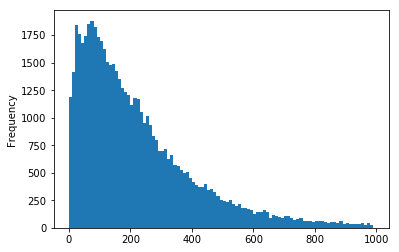

In [12]:
seq_df["utr"].str.len().plot.hist(bins=np.arange(0,1000,10))

In [76]:
(np.sum((seq_df["utr"].str.len() <= 200) & (seq_df["utr"].str.len() > 0))/len(seq_df["utr"]))*100

55.489319423745656

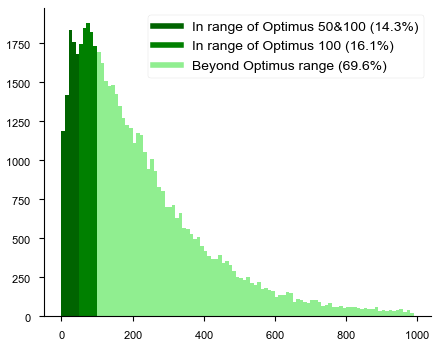

In [64]:
colors = ["darkgreen", "green", "lightgreen"]
font_size=10
fig_dims = (5.0, 4.0)

fig, ax = plt.subplots()
N, bins, patches = ax.hist(seq_df["utr"].str.len(), bins=np.arange(0,1000,10), color=colors[2])

for i in range(0,5):
    patches[i].set_facecolor(colors[0])
for i in range(5,10):    
    patches[i].set_facecolor(colors[1])

optimus50_pct = (np.sum(seq_df["utr"].str.len() <= 50)/len(seq_df["utr"]))*100
optimus100_pct = (np.sum((seq_df["utr"].str.len() <= 100) & (seq_df["utr"].str.len() > 50))/len(seq_df["utr"]))*100
beyond_pct = (np.sum(seq_df["utr"].str.len() > 100)/len(seq_df["utr"]))*100
    
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]
ax.legend(custom_lines, ["In range of Optimus 50&100 (" + str(round(optimus50_pct,1)) + "%)",
                         "In range of Optimus 100 (" + str(round(optimus100_pct,1)) + "%)",
                         "Beyond Optimus range (" + str(round(beyond_pct,1)) + "%)"],
         fontsize=font_size)
sns.despine(fig)
fig.set_size_inches(fig_dims)
fig.savefig("../Graphics/utrlen_hist.svg")

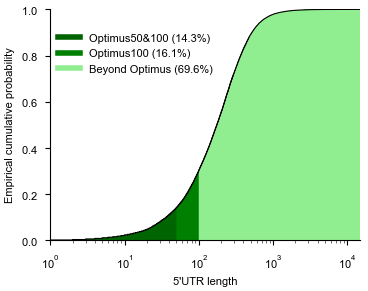

In [80]:
font_size=8
fig_dims = (4.0, 3.0)

colors = ["darkgreen", "green", "lightgreen"]

sample = np.array(seq_df["utr"].str.len())
ecdf = sm.distributions.ECDF(sample)

fig, ax = plt.subplots()
x = np.sort(sample)
y = ecdf(x)
ax.step(x, y, where="post", c="black")
idx1 = np.argmax(x >= 50)
idx2 = np.argmax(x >= 100)
ax.fill_between(x[0:], 0, y[0:], facecolor=colors[0], step="post")
ax.fill_between(x[idx1:], 0, y[idx1:], facecolor=colors[1], step="post")
ax.fill_between(x[idx2:], 0, y[idx2:], facecolor=colors[2], step="post")
ax.set_ylim(0,1.0)
ax.set_xlim(1,max(sample))
ax.set_ylabel('Empirical cumulative probability', fontsize=font_size)
#ax.set_xticks(x_pos)
#ax.set_xticklabels(names)
ax.set_xlabel("5'UTR length", fontsize=font_size)
#ax.vlines(50, ymin=0, ymax=1)
#ax.vlines(100, ymin=0, ymax=1)
ax.set_xscale('log')

optimus50_pct = (np.sum(seq_df["utr"].str.len() <= 50)/len(seq_df["utr"]))*100
optimus100_pct = (np.sum((seq_df["utr"].str.len() <= 100) & (seq_df["utr"].str.len() > 50))/len(seq_df["utr"]))*100
beyond_pct = (np.sum(seq_df["utr"].str.len() > 100)/len(seq_df["utr"]))*100
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]
ax.legend(custom_lines, ["Optimus50&100 (" + str(round(optimus50_pct,1)) + "%)",
                         "Optimus100 (" + str(round(optimus100_pct,1)) + "%)",
                         "Beyond Optimus (" + str(round(beyond_pct,1)) + "%)"],
          frameon=False,
          loc=(0.01,0.70),
         fontsize=font_size)

sns.despine(fig)
fig.set_size_inches(fig_dims)
fig.savefig("../Graphics/utrlen_ecdf.svg")